In [77]:
# import libraries
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEndpointEmbeddings
from langchain_groq import ChatGroq
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv

In [22]:
load_dotenv()

True

## **1. Indexing**


Loading the Data


In [31]:
# We need to create an object for Youtube Transcript API

yt_transcript = YouTubeTranscriptApi()

In [ ]:
video_id = "Gfr50f6ZBvo"  # only the ID, not full URL
try:
    # If you don’t care which language, this returns the “best” one
    transcript_list = yt_transcript.fetch(video_id=video_id, languages=["en"])

    # Flatten it to plain text(remove time and only get text)
    # using dot because it of subscriptable issue
    transcript = " ".join(chunk.text for chunk in transcript_list)
    # print(transcript)

except TranscriptsDisabled:
    print("No captions available for this video.")

Transcript are along with there timestamp and text.


In [33]:
"""Testing Part for Checking Transcript Working"""

# transcript_list
transcript_list[0]
transcript_list[0].text


'the following is a conversation with'

SPlitting the Data


In [34]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

In [35]:
len(chunks)

168

In [36]:
chunks[0]

Document(metadata={}, page_content="the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to inter

In [37]:
chunks[0].page_content

"the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough

Convert Chunks to Embedding.

And Store Them to FIASS Vector Store


In [ ]:
embedding_model_url = "Qwen/Qwen3-Embedding-8B"

# using api thats why we need endpoint
embeddings = HuggingFaceEndpointEmbeddings(model=embedding_model_url)

In [46]:
# Storing EMbeddings in FIASS

vector_store = FAISS.from_documents(chunks, embeddings)

In [47]:
# to list down in dictionary form
vector_store.index_to_docstore_id

{0: '50924882-eb71-4b8e-bdb8-b629c8eb17d0',
 1: '4edb20d1-10c2-4090-80ef-b000d7f3a0cb',
 2: '13bafd4c-d916-4a16-adf5-8e858a61c73c',
 3: 'e44551fe-4d7e-4950-b7c9-41e6f637015f',
 4: 'd2c56482-4737-417a-9972-6b0764f1fb35',
 5: '411bf37f-1317-4d8c-8f31-19ecfe8f6e4e',
 6: 'b4d5a16d-39e0-4f08-aafa-517b4860712e',
 7: 'ea9b4a64-c146-4b42-9c14-9ac80a3460ef',
 8: '941f395d-44a9-45f5-9bc7-9857bc86c8c8',
 9: '102d9130-981d-4532-9094-2b49ce25df46',
 10: 'aeb45e99-59d1-44a4-a88d-a3f61d173648',
 11: '96b9e35d-e817-4448-81c6-db79c450176b',
 12: '2abcb62a-90ec-4e8d-b752-9f89c163f5f7',
 13: 'bcf37d9c-7cfd-47b7-a726-6e8d16a4ff0a',
 14: 'f5fba77b-6018-4e0e-97a8-df9b09817f90',
 15: 'f106b822-b423-4d05-b58d-8015f282b1c0',
 16: 'fe7e4126-de1b-46d5-8849-e56e50bb091e',
 17: '082ba6bd-eae6-4c18-a0e7-dbd2d6318a21',
 18: '4ba0f3b4-6f16-4e9a-baae-c935ae6d7440',
 19: '61e84522-fb8d-4ea2-a149-2cc12e8edcd5',
 20: 'c458bdb3-be91-4579-80ba-717a4641098c',
 21: '55d7053f-5bf7-49b9-9c29-1e09e742da7d',
 22: '244274d4-2823-

In [50]:
vector_store.get_by_ids(
    ["5f8c6888-64db-4b88-b45a-6508b54652c4", "4e7b0241-0045-406a-b68b-db6cf10fdc78"]
)

[Document(id='5f8c6888-64db-4b88-b45a-6508b54652c4', metadata={}, page_content="you realize how little you know so it humbles you but excites you by the possibility of learning more it's one heck of a one heck of a puzzle we got going on here um so like i mentioned of all the people in the world you're very likely to be the one who creates the agi system um that achieves human level intelligence and goes beyond it so if you got a chance and very well you could be the person that goes into the room with the system and have a conversation maybe you only get to ask one question if you do what question would you ask her i would probably ask um what is the true nature of reality i think that's the question i don't know if i'd understand the answer because maybe it would be 42 or something like that but um that's the question i would ask and then there'll be a deep sigh from the systems like all right how do i explain to the excuse me exactly all right let me i don't have time to explain uh 

## **2.Retrivel**


In [51]:
# create basic similary retrieval

retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

In [52]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEndpointEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001E8F2CD33E0>, search_kwargs={'k': 4})

In [53]:
# Since retriever is also A runnable so it has its own invoke method
# Test query
retriever.invoke("What is Deepmind")

[Document(id='fd1d77ed-8c7f-4108-85cf-9a34872c6603', metadata={}, page_content="and how it works this is tough to uh ask you this question because you probably will say it's everything but let's let's try let's try to think to this because you're in a very interesting position where deepmind is the place of some of the most uh brilliant ideas in the history of ai but it's also a place of brilliant engineering so how much of solving intelligence this big goal for deepmind how much of it is science how much is engineering so how much is the algorithms how much is the data how much is the hardware compute infrastructure how much is it the software computer infrastructure yeah um what else is there how much is the human infrastructure and like just the humans interact in certain kinds of ways in all the space of all those ideas how much does maybe like philosophy how much what's the key if um uh if if you were to sort of look back like if we go forward 200 years look back what was the key 

## **3.Augmentation**


In [ ]:
# # create llm with HuggingFace Model
# text_model_url = "meta-llama/Llama-3.1-8B-Instruct"

# llm = HuggingFaceEndpoint(repo_id=text_model_url,task='conversational')


In [78]:
# create Chat model using Groq

text_model_url = "openai/gpt-oss-20b"

llm = ChatGroq(model=text_model_url)

In [79]:
# create a prompt template to join context and user query

prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables=["context", "question"],
)

In [80]:
question = "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"

retrieved_docs = retriever.invoke(question)

In [ ]:
# This will contain k docs
retrieved_docs

[Document(id='5c1e8104-21b1-48ae-a60c-4193f02b31ca', metadata={}, page_content="like room temperature superconductors or something on my list one day i'd like to like you know have an ai system to help build better optimized batteries all of these sort of mechanical things mr i think a systematic sort of search could be uh guided by a model could be um could be extremely powerful so speaking of which you have a paper on nuclear fusion uh magnetic control of tokamak plasmas to deep reinforcement learning so you uh you're seeking to solve nuclear fusion with deep rl so it's doing control of high temperature plasmas can you explain this work and uh can ai eventually solve nuclear fusion it's been very fun last year or two and very productive because we've been taking off a lot of my dream projects if you like of things that i've collected over the years of areas of science that i would like to i think could be very transformative if we helped accelerate and uh really interesting problems 

In [ ]:
# extract page content from the retrieved docs and join them to make one paragraph
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

"like room temperature superconductors or something on my list one day i'd like to like you know have an ai system to help build better optimized batteries all of these sort of mechanical things mr i think a systematic sort of search could be uh guided by a model could be um could be extremely powerful so speaking of which you have a paper on nuclear fusion uh magnetic control of tokamak plasmas to deep reinforcement learning so you uh you're seeking to solve nuclear fusion with deep rl so it's doing control of high temperature plasmas can you explain this work and uh can ai eventually solve nuclear fusion it's been very fun last year or two and very productive because we've been taking off a lot of my dream projects if you like of things that i've collected over the years of areas of science that i would like to i think could be very transformative if we helped accelerate and uh really interesting problems scientific challenges in of themselves this is energy so energy yes exactly so\

In [83]:
# Create prompt from context and query

final_prompt = prompt.invoke({"context": context_text, "question": question})

In [75]:
final_prompt

StringPromptValue(text="\n      You are a helpful assistant.\n      Answer ONLY from the provided transcript context.\n      If the context is insufficient, just say you don't know.\n\n      like room temperature superconductors or something on my list one day i'd like to like you know have an ai system to help build better optimized batteries all of these sort of mechanical things mr i think a systematic sort of search could be uh guided by a model could be um could be extremely powerful so speaking of which you have a paper on nuclear fusion uh magnetic control of tokamak plasmas to deep reinforcement learning so you uh you're seeking to solve nuclear fusion with deep rl so it's doing control of high temperature plasmas can you explain this work and uh can ai eventually solve nuclear fusion it's been very fun last year or two and very productive because we've been taking off a lot of my dream projects if you like of things that i've collected over the years of areas of science that i

## **4.Generation**


In [84]:
# Get the result
result = llm.invoke(final_prompt)
print(result)

content='Yes – the transcript discusses nuclear fusion.  \nThe main points covered are:\n\n* **AI for plasma control** – Using deep reinforcement learning to automatically adjust magnetic fields in a tokamak, instead of traditional handcrafted controllers.  \n* **Collaboration with EPFL** – Working with the Swiss Technical Institute’s test reactor, which provided a real‑world environment and a simulator for training.  \n* **Bottleneck analysis** – Identifying key physics, material‑science, and engineering challenges that still prevent practical fusion, and selecting those amenable to AI methods.  \n* **Results** – A Nature paper demonstrating AI‑guided control that successfully maintained the plasma in desired shapes and improved stability.' additional_kwargs={'reasoning_content': 'We have a user question: "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"\n\nWe need to answer based on provided transcript context. The transcript indeed discusses nu

In [85]:
result.content

'Yes – the transcript discusses nuclear fusion.  \nThe main points covered are:\n\n* **AI for plasma control** – Using deep reinforcement learning to automatically adjust magnetic fields in a tokamak, instead of traditional handcrafted controllers.  \n* **Collaboration with EPFL** – Working with the Swiss Technical Institute’s test reactor, which provided a real‑world environment and a simulator for training.  \n* **Bottleneck analysis** – Identifying key physics, material‑science, and engineering challenges that still prevent practical fusion, and selecting those amenable to AI methods.  \n* **Results** – A Nature paper demonstrating AI‑guided control that successfully maintained the plasma in desired shapes and improved stability.'

## **Complete End to End Pipeline Using Chain**


How we are going to build the System

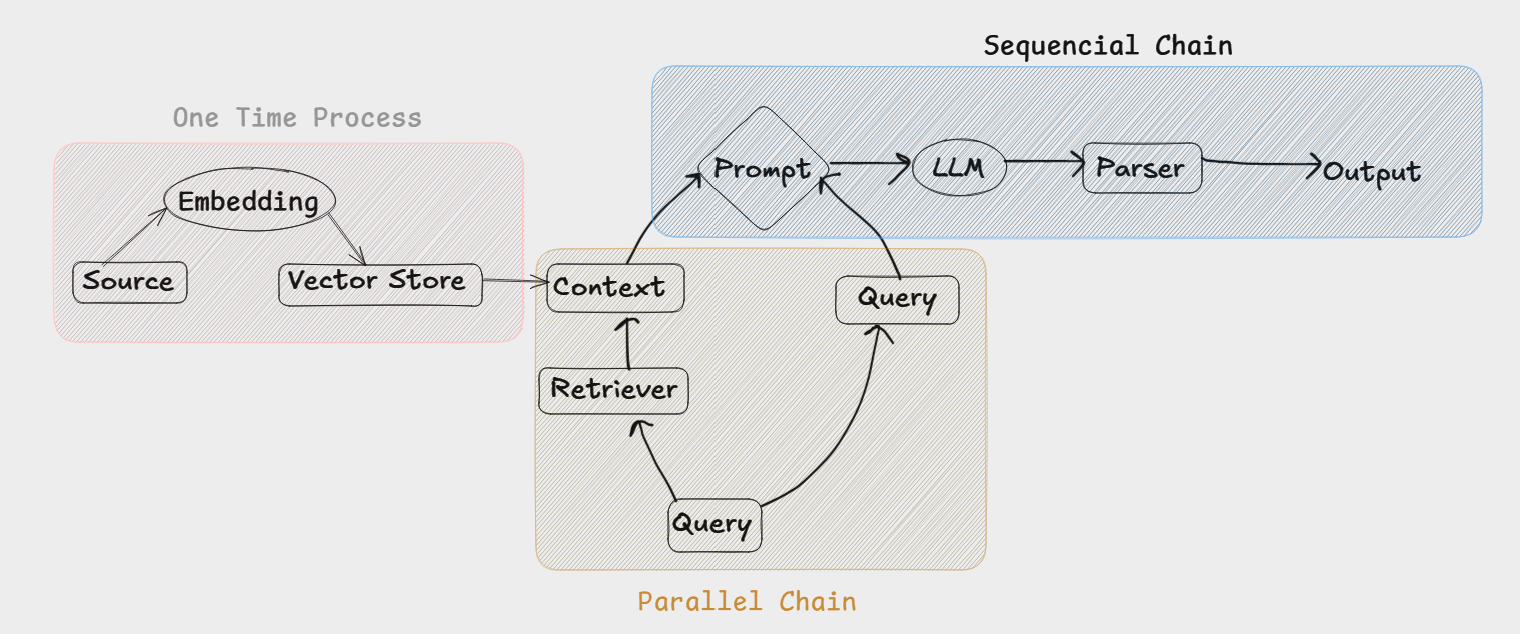


In [ ]:
from langchain_core.runnables import (
    RunnableSequence,
    RunnableParallel,
    RunnableLambda,
    RunnablePassthrough,
)
from langchain_core.output_parsers import StrOutputParser

In [ ]:
# first create the function to join the strings of document from retrieved docs and make a single paragraph for context


def context_text_convertor(retrieved_docs):
    context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return context_text

In [ ]:
# Parallel chain

my_parallel_chain = RunnableParallel(
    {
        # """This is doing the conversion of timestamp to simple string and then we are retrieving that string"""
        # retriever will recieve query and then search for similar docs based on embeddings | convert those docs into single paragraph
        "context": retriever | RunnableLambda(context_text_convertor),
        # We need question as it is to make final prompt with context
        "question": RunnablePassthrough(),
    }
)

In [102]:
# lets check
my_parallel_chain.invoke("who is demis")

{'context': "out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough to interview you well i'll be impressed if if you were i'd be impressed by myself if you were i don't think we're quite up to that yet but uh maybe you're from the future lex if you did would you tell me is that is that a good thing to tell a language model that's tasked with interviewing that it is in fact um ai maybe we're in a kind of meta turing test uh probably probably it would be a good idea not to tell you so it doesn't change your behavior right this is a kind of heisenberg uncertainty principle situation if i told you you behave differently yeah maybe that's what's happening with us of course this is a benchmark from the future where they replay 2022 as a year before ais were good enough yet and now we want to see is it going to pass exactly if i was such a program wou

**now this dictionary has context and question**

With this parallel chain is completed


In [103]:
# create a parser
parser = StrOutputParser()

In [104]:
# our prompt expect two inputs, context and a question which we are getting from parallel chain

final_chain = my_parallel_chain | prompt | llm | parser

In [105]:
final_result = final_chain.invoke("Summarize the video")
print(final_result)

**Video Summary**

The podcast is a discussion about the limits of current AI systems and how humans use language to communicate complex, abstract ideas.  
- **Game Design:** One speaker proposes a game like Go that is quick to learn (five minutes), deep enough to take a lifetime to master, aesthetically beautiful, and can be played in a few hours. The point is that such a game illustrates the challenge of encoding high‑level, abstract concepts into AI.  
- **Generalization & Modality:** The conversation turns to how AI (and humans) generalize across tasks by shifting between different modalities of understanding, with language being the primary tool but not the only one.  
- **Interview with Demis Hassabis:** The host interviews Demis Hassabis about the idea of an AI program that interviews people until it can interview Hassabis itself. They touch on the “meta‑Turing test” concept—whether telling an AI it is an AI changes its behavior—and the possibility that revealing its nature coul

**Working Behind the Seens for Chain**

Whatever data source we needed we first load that _(In our case it was youtube transcript which we load using youtube api and remove time stamp from it and store the text only)_ `-->` Splitted the data into chunks `-->` Convert the chunks to embeddings `-->` Store those embeddings in vector store `-->` Point the retriver to vector store with search type and number of documents need to retrieve i.e `k`

---

when invoke with query `-->` query goes to retriever `-->` retriever fetch the similar `k` number of document list from vector store `-->` these documents are formatted to single paragraph and become context `-->` Now the context and query are combined together to form a prompt `-->` then this prompt goes to llm `-->` llm get the context and query and give answer `-->` the answer is parsed through string output parser for easy to view
